C:\Users\jagda\AppData\Local\Temp\ipykernel_16060\2470205733.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='TotalScore', data=df, edgecolor='black', palette=colors)


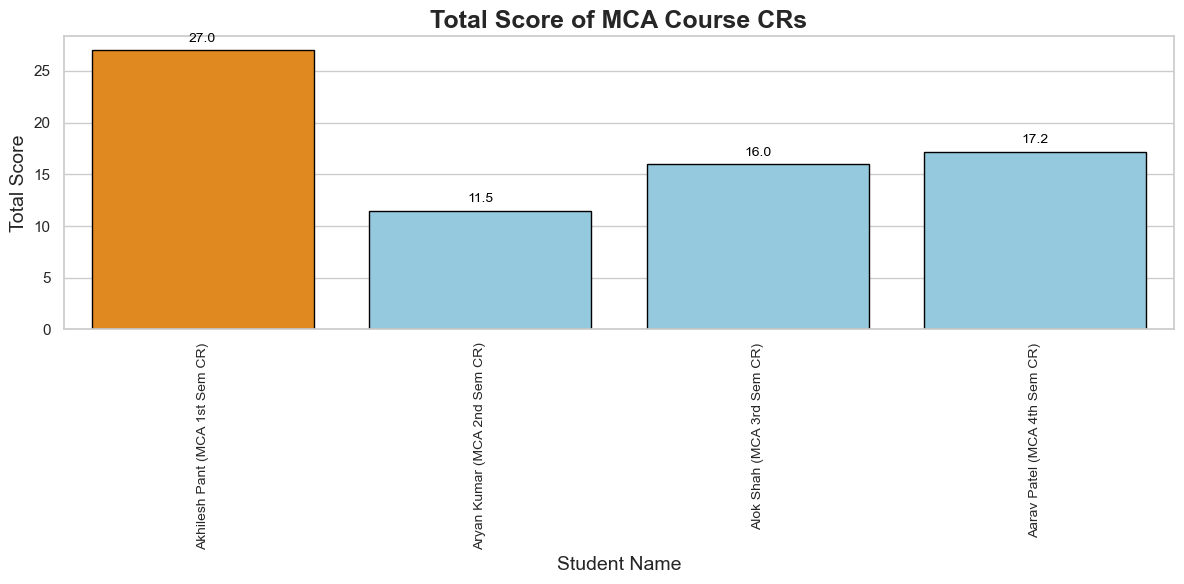


Detailed Data for CR, Coordinator and Worst Students:
                             Name  GetUpTime  StudyHours  FitnessHours  \
0  Akhilesh Pant (MCA 1st Sem CR)          6           7           1.5   
1    Aryan Kumar (MCA 2nd Sem CR)          7           6           1.0   
2      Alok Shah (MCA 3rd Sem CR)          7           5           1.0   

   Personality  TotalScore         Role  
0            8        27.0  Coordinator  
1            7        11.5      Student  
2            8        16.0      Student  

Improvement Timetable for Worst Students:
- GetUpTime: 6
- StudyHours: 6
- FitnessHours: 1.5
- PersonalityPractice: 8


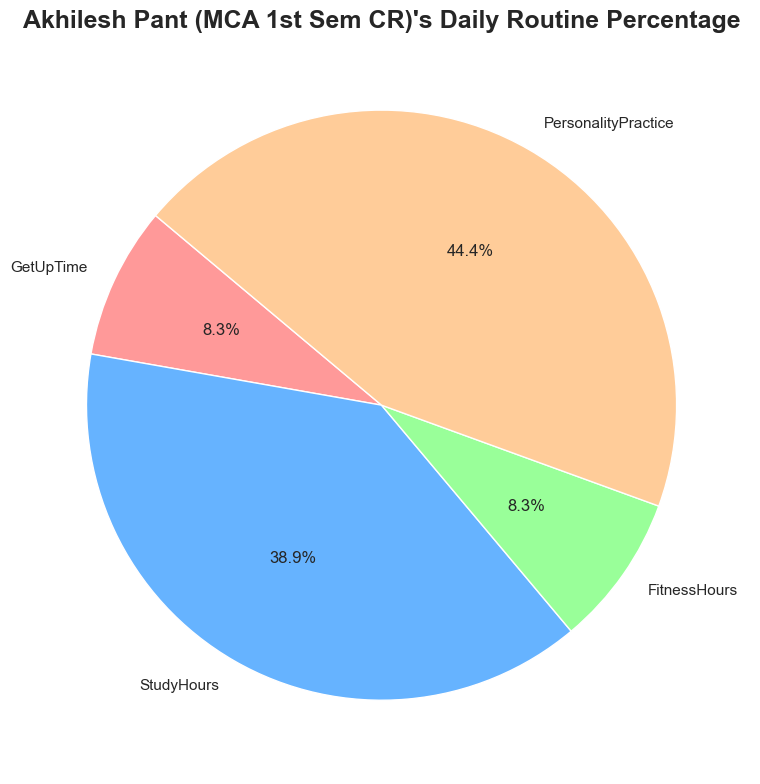

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set global styles for charts
sns.set_theme(style="whitegrid")
plt.rcParams['font.size'] = 12

# Manually created dataset of students
student_data = {
    'Name': ["Akhilesh Pant (MCA 1st Sem CR)", "Aryan Kumar (MCA 2nd Sem CR)", "Alok Shah (MCA 3rd Sem CR)", "Aarav Patel (MCA 4th Sem CR)"],
    'GetUpTime': [6, 7, 7, 6],
    'StudyHours': [7, 6, 5, 5],
    'FitnessHours': [1.5, 1.0, 1.0, 1.1],
    'Personality': [8, 7, 8, 8]
}

# Create DataFrame
df = pd.DataFrame(student_data)

# Normalization process
df['NormalizedGetUpTime'] = 10 - df['GetUpTime']
df['NormalizedStudyHours'] = (df['StudyHours'] - df['StudyHours'].min()) / (df['StudyHours'].max() - df['StudyHours'].min()) * 9 + 1  # Scaling to range [1, 10]
df['NormalizedFitnessHours'] = df['FitnessHours'] * 2
df['NormalizedPersonality'] = (df['Personality'] - df['Personality'].min()) / (df['Personality'].max() - df['Personality'].min()) * 9 + 1  # Scaling to range [1, 10]

# Calculate total scores
df['TotalScore'] = (
    df['NormalizedGetUpTime']
    + df['NormalizedStudyHours']
    + df['NormalizedFitnessHours']
    + df['NormalizedPersonality']
)

# Assign roles manually
df['Role'] = 'Student'
df.loc[df['Name'] == "Akhilesh Pant (MCA 1st Sem CR)", 'Role'] = 'CR'

# Identify the student with the maximum TotalScore
max_score_student = df.loc[df['TotalScore'].idxmax(), 'Name']
df.loc[df['Name'] == max_score_student, 'Role'] = 'Coordinator'

# Identify the worst students (bottom 2 based on TotalScore)
worst_students = df.nsmallest(2, 'TotalScore')

# Filter data for CR, Coordinator, and worst students
highlighted_students = pd.concat([df[df['Role'] == 'CR'], df[df['Role'] == 'Coordinator'], worst_students])

# Plot bar chart for all students with total scores
plt.figure(figsize=(12, 6))
colors = ['darkorange' if name == max_score_student else 'skyblue' for name in df['Name']]
sns.barplot(x='Name', y='TotalScore', data=df, edgecolor='black', palette=colors)
plt.title('Total Score of MCA Course CRs', fontsize=18, weight='bold')
plt.xlabel('Student Name', fontsize=14)
plt.ylabel('Total Score', fontsize=14)
plt.xticks(rotation=90, fontsize=10)

# Annotate the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 8),
                       textcoords='offset points')

plt.tight_layout()
plt.show()

# Show detailed attributes for CR, Coordinator, and worst students
print("\nDetailed Data for CR, Coordinator and Worst Students:")
print(highlighted_students[['Name', 'GetUpTime', 'StudyHours', 'FitnessHours', 'Personality', 'TotalScore', 'Role']])

# Improvement timetable for worst students
improvement_timetable = {
    'GetUpTime': 6,
    'StudyHours': 6,
    'FitnessHours': 1.5,
    'PersonalityPractice': 8,
}

print("\nImprovement Timetable for Worst Students:")
for key, value in improvement_timetable.items():
    print(f"- {key}: {value}")

# Data for MCA Coordinator's daily routine
coordinator_data = df[df['Role'] == 'Coordinator'].iloc[0]
routine_labels = ['GetUpTime', 'StudyHours', 'FitnessHours', 'PersonalityPractice']
routine_hours = [24 - coordinator_data['GetUpTime'] - coordinator_data['StudyHours'] - coordinator_data['FitnessHours'] - 8, coordinator_data['StudyHours'], coordinator_data['FitnessHours'], 8]
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(routine_hours, labels=routine_labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title(f"{coordinator_data['Name']}'s Daily Routine Percentage", fontsize=18, weight='bold')
plt.tight_layout()
plt.show()


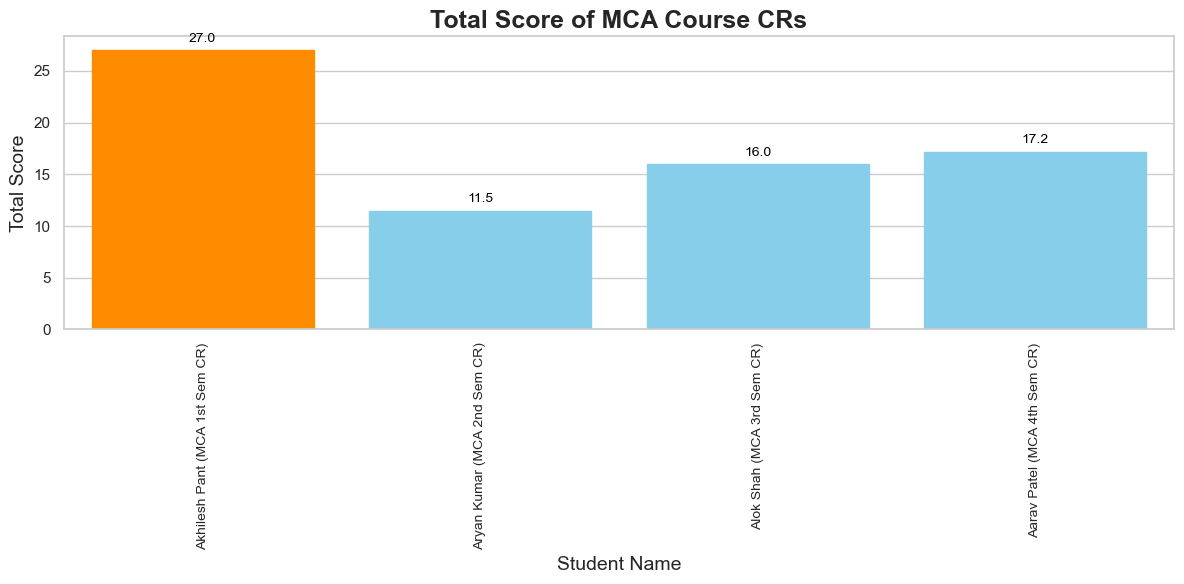


Detailed Data for CR, Coordinator and Worst Students:
                             Name  GetUpTime  StudyHours  FitnessHours  \
0  Akhilesh Pant (MCA 1st Sem CR)          6           7           1.5   
1    Aryan Kumar (MCA 2nd Sem CR)          7           6           1.0   
2      Alok Shah (MCA 3rd Sem CR)          7           5           1.0   

   Personality  TotalScore         Role  
0            8        27.0  Coordinator  
1            7        11.5      Student  
2            8        16.0      Student  

Improvement Timetable for Worst Students:
- GetUpTime: 6
- StudyHours: 6
- FitnessHours: 1.5
- PersonalityPractice: 8


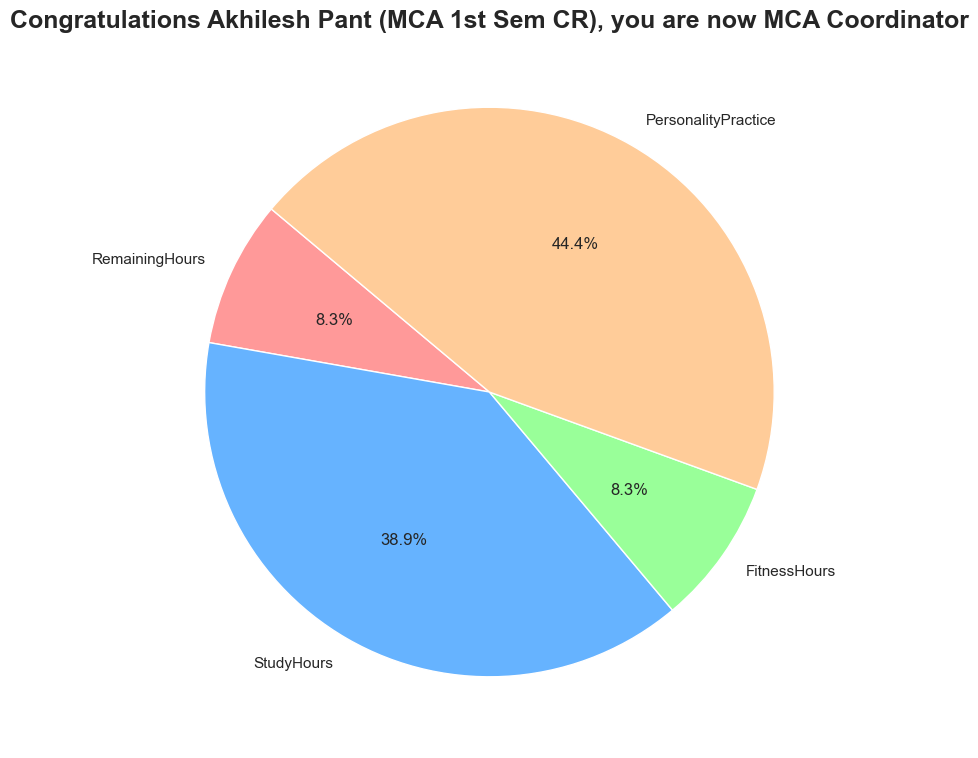

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set global styles for charts
sns.set_theme(style="whitegrid")
plt.rcParams['font.size'] = 12

# Manually created dataset of students
student_data = {
    'Name': ["Akhilesh Pant (MCA 1st Sem CR)", "Aryan Kumar (MCA 2nd Sem CR)", "Alok Shah (MCA 3rd Sem CR)", "Aarav Patel (MCA 4th Sem CR)"],
    'GetUpTime': [6, 7, 7, 6],
    'StudyHours': [7, 6, 5, 5],
    'FitnessHours': [1.5, 1.0, 1.0, 1.1],
    'Personality': [8, 7, 8, 8]
}

# Create DataFrame
df = pd.DataFrame(student_data)

# Normalization process
df['NormalizedGetUpTime'] = 10 - df['GetUpTime']
df['NormalizedStudyHours'] = (df['StudyHours'] - df['StudyHours'].min()) / (df['StudyHours'].max() - df['StudyHours'].min()) * 9 + 1  # Scaling to range [1, 10]
df['NormalizedFitnessHours'] = df['FitnessHours'] * 2
df['NormalizedPersonality'] = (df['Personality'] - df['Personality'].min()) / (df['Personality'].max() - df['Personality'].min()) * 9 + 1  # Scaling to range [1, 10]

# Calculate total scores
df['TotalScore'] = (
    df['NormalizedGetUpTime']
    + df['NormalizedStudyHours']
    + df['NormalizedFitnessHours']
    + df['NormalizedPersonality']
)

# Assign roles manually
df['Role'] = 'Student'
df.loc[df['Name'] == "Akhilesh Pant (MCA 1st Sem CR)", 'Role'] = 'CR'

# Identify the student with the maximum TotalScore
max_score_student = df.loc[df['TotalScore'].idxmax(), 'Name']
df.loc[df['Name'] == max_score_student, 'Role'] = 'Coordinator'

# Identify the worst students (bottom 2 based on TotalScore)
worst_students = df.nsmallest(2, 'TotalScore')

# Filter data for CR, Coordinator, and worst students
highlighted_students = pd.concat([df[df['Role'] == 'CR'], df[df['Role'] == 'Coordinator'], worst_students])

# Plot bar chart for all students with total scores
plt.figure(figsize=(12, 6))
bars = sns.barplot(x='Name', y='TotalScore', data=df, edgecolor='black', dodge=False)
bars.set_title('Total Score of MCA Course CRs', fontsize=18, weight='bold')
bars.set_xlabel('Student Name', fontsize=14)
bars.set_ylabel('Total Score', fontsize=14)
plt.xticks(rotation=90, fontsize=10)

# Annotate the bars
for i, p in enumerate(bars.patches):
    color = 'darkorange' if df.iloc[i]['Name'] == max_score_student else 'skyblue'
    p.set_color(color)
    bars.annotate(f'{p.get_height():.1f}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', fontsize=10, color='black', xytext=(0, 8),
                  textcoords='offset points')

plt.tight_layout()
plt.show()

# Show detailed attributes for CR, Coordinator, and worst students
print("\nDetailed Data for CR, Coordinator and Worst Students:")
print(highlighted_students[['Name', 'GetUpTime', 'StudyHours', 'FitnessHours', 'Personality', 'TotalScore', 'Role']])

# Improvement timetable for worst students
improvement_timetable = {
    'GetUpTime': 6,
    'StudyHours': 6,
    'FitnessHours': 1.5,
    'PersonalityPractice': 8,
}

print("\nImprovement Timetable for Worst Students:")
for key, value in improvement_timetable.items():
    print(f"- {key}: {value}")

# Data for MCA Coordinator's daily routine
coordinator_data = df[df['Role'] == 'Coordinator'].iloc[0]
routine_labels = ['RemainingHours', 'StudyHours', 'FitnessHours', 'PersonalityPractice']
remaining_hours = max(0, 24 - coordinator_data['GetUpTime'] - coordinator_data['StudyHours'] - coordinator_data['FitnessHours'] - 8)
routine_hours = [remaining_hours, coordinator_data['StudyHours'], coordinator_data['FitnessHours'], 8]
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(routine_hours, labels=routine_labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title(f"Congratulations {coordinator_data['Name']}, you are now MCA Coordinator", fontsize=18, weight='bold')
plt.tight_layout()
plt.show()


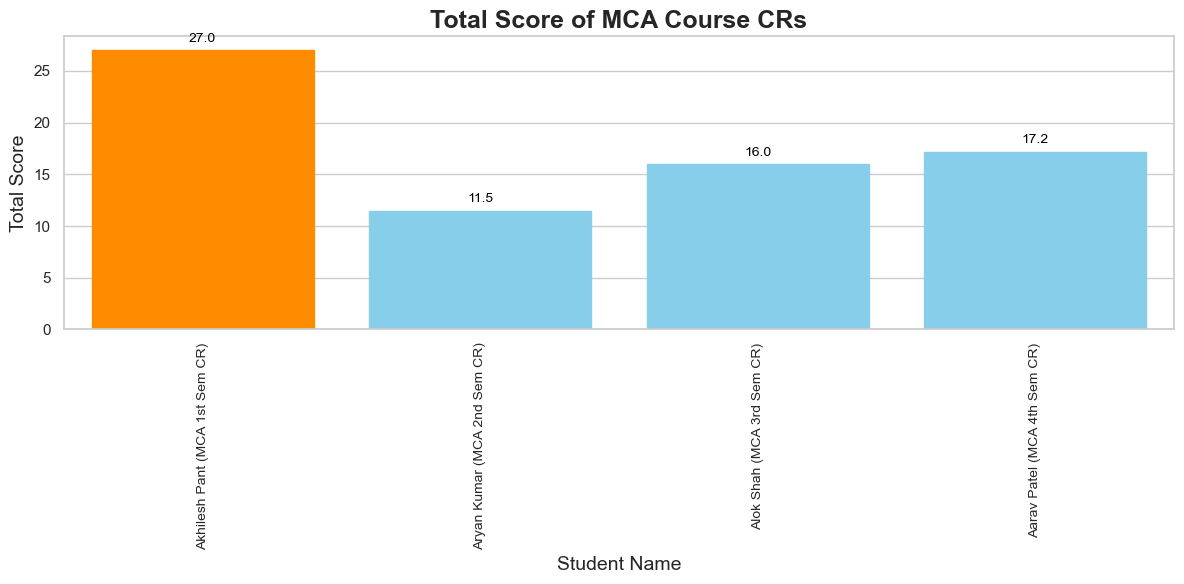

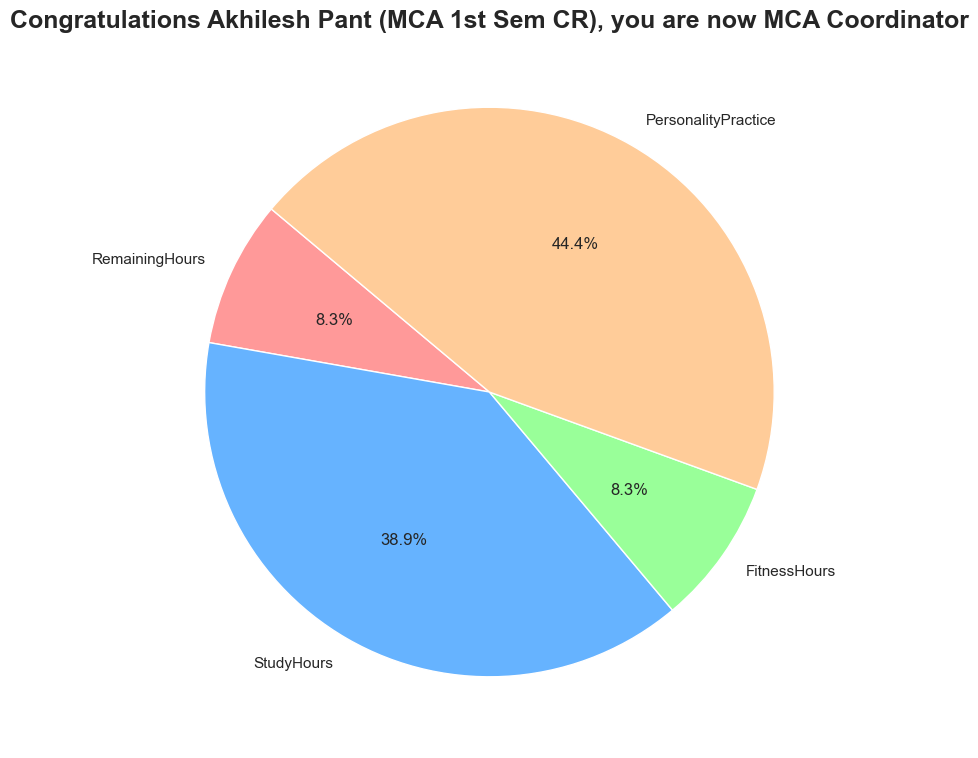

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set global styles for charts
sns.set_theme(style="whitegrid")
plt.rcParams['font.size'] = 12

# Manually created dataset of students
student_data = {
    'Name': [
        "Akhilesh Pant (MCA 1st Sem CR)",
        "Aryan Kumar (MCA 2nd Sem CR)",
        "Alok Shah (MCA 3rd Sem CR)",
        "Aarav Patel (MCA 4th Sem CR)"
    ],
    'GetUpTime': [6, 7, 7, 6],
    'StudyHours': [7, 6, 5, 5],
    'FitnessHours': [1.5, 1.0, 1.0, 1.1],
    'Personality': [8, 7, 8, 8]
}

# Create DataFrame
df = pd.DataFrame(student_data)

# Normalization process
df['NormalizedGetUpTime'] = 10 - df['GetUpTime']
df['NormalizedStudyHours'] = (
    (df['StudyHours'] - df['StudyHours'].min()) /
    (df['StudyHours'].max() - df['StudyHours'].min()) * 9 + 1  # Scaling to range [1, 10]
)
df['NormalizedFitnessHours'] = df['FitnessHours'] * 2
df['NormalizedPersonality'] = (
    (df['Personality'] - df['Personality'].min()) /
    (df['Personality'].max() - df['Personality'].min()) * 9 + 1  # Scaling to range [1, 10]
)

# Calculate total scores
df['TotalScore'] = (
    df['NormalizedGetUpTime']
    + df['NormalizedStudyHours']
    + df['NormalizedFitnessHours']
    + df['NormalizedPersonality']
)

# Assign roles manually
df['Role'] = 'Student'
df.loc[df['Name'] == "Akhilesh Pant (MCA 1st Sem CR)", 'Role'] = 'CR'

# Identify the student with the maximum TotalScore
max_score_student = df.loc[df['TotalScore'].idxmax(), 'Name']
df.loc[df['Name'] == max_score_student, 'Role'] = 'Coordinator'

# Plot bar chart for all students with total scores
plt.figure(figsize=(12, 6))
bars = sns.barplot(x='Name', y='TotalScore', data=df, edgecolor='black', dodge=False)
bars.set_title('Total Score of MCA Course CRs', fontsize=18, weight='bold')
bars.set_xlabel('Student Name', fontsize=14)
bars.set_ylabel('Total Score', fontsize=14)
plt.xticks(rotation=90, fontsize=10)

# Annotate the bars
for i, p in enumerate(bars.patches):
    color = 'darkorange' if df.iloc[i]['Name'] == max_score_student else 'skyblue'
    p.set_color(color)
    bars.annotate(f'{p.get_height():.1f}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', fontsize=10, color='black', xytext=(0, 8),
                  textcoords='offset points')

plt.tight_layout()
plt.show()

# Data for MCA Coordinator's daily routine
coordinator_data = df[df['Role'] == 'Coordinator'].iloc[0]
routine_labels = ['RemainingHours', 'StudyHours', 'FitnessHours', 'PersonalityPractice']
remaining_hours = max(0, 24 - coordinator_data['GetUpTime'] - coordinator_data['StudyHours'] - coordinator_data['FitnessHours'] - 8)
routine_hours = [remaining_hours, coordinator_data['StudyHours'], coordinator_data['FitnessHours'], 8]
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(routine_hours, labels=routine_labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title(f"Congratulations {coordinator_data['Name']}, you are now MCA Coordinator", fontsize=18, weight='bold')
plt.tight_layout()
plt.show()
